In [18]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Sequence, Tuple
from antea.elec import tof_functions as wvf 
from scipy import signal
from scipy.optimize import leastsq
from scipy.optimize import least_squares
from proposals import SQRT_integrator
from proposals import LOG_integrator
from proposals import LIN_integrator
from waveforms import wave_gen
from optimization import evaluation

%matplotlib nbagg
%reload_ext autoreload
%autoreload 2

In [8]:
time_unit    = 100E-12
PULSE_LENGTH = 5000
PE_inc       = 0.25
MAX_PE       = 1000
LSB_PE_L     = 4
TIME         = np.arange(0,(MAX_PE/PE_inc)*PULSE_LENGTH,PULSE_LENGTH)
PE           = np.arange(0,MAX_PE,PE_inc)
#TIME_rnd = np.add.accumulate(np.random.poisson(9,100))
#PE_rnd   = np.random.choice([1,2],100,replace=True,p=[0.95,0.05])
#TIME_rnd     = np.array([ 500, 570,1000,1040,1060,1100,1110,1160,1200,1230,1300,
#                          1400,1440,1460,1500,1510,1560,1600,1630,1700,1710,1750])
#PE_rnd       = np.array([   1,   4,  30,  40,  25,  15,  20,  25,  30,  10,   4,   
#                           25,  35,  20,  10,  40,  30,  15,  10,   5,   4,   1])

### MAX NUMBER OF PE = 500
### LINEAR CONVERSION  --   PE = 4 LSB !!!! (Not a good idea)
### Noise threshold (est.) = 80uV  /  80nA

CHECK: Electrons in spe_response = 1.000000


<IPython.core.display.Javascript object>


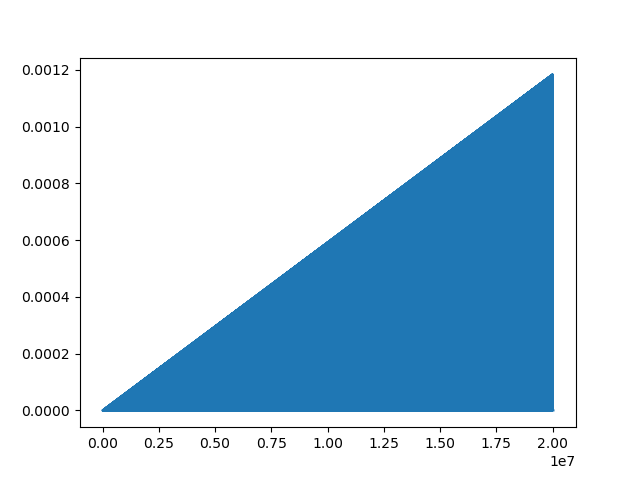

In [9]:
time,signal_out = wave_gen(np.vstack([TIME,PE]), time_unit, Bandwidth=25E6)
#plt.figure()
#plt.plot(signal_out)

In [23]:
testbench = evaluation(time_unit = time_unit,
                        max_pe    = MAX_PE,
                        lsb_pe    = LSB_PE_L,
                        pulse_length = PULSE_LENGTH,
                        signal    = signal_out,
                        PE_array  = PE,
                        PE_inc    = PE_inc)


mosfet_params = {'KPP_2n':150E-6, 'W_L':10,  'VTH':0.55}
caps          = {'cap0':7E-12,  'cap1':1E-12, 'cap2':0.6E-12}

I1_lin = LIN_integrator(KPP_2n = mosfet_params['KPP_2n'],
                            W_L = mosfet_params['W_L'],
                            VTH = mosfet_params['VTH'],
                            time_unit = time_unit,
                            cap = caps['cap0'],
                            I_o = 10E-6,
                            I_a = 10E-6)

I1_sqrt = SQRT_integrator(KPP_2n = mosfet_params['KPP_2n'],
                            W_L = mosfet_params['W_L'],
                            VTH = mosfet_params['VTH'],
                            time_unit = time_unit,
                            cap = caps['cap0'],
                            I_o = 10E-6,
                            I_a = 5E-6)

I2_log = LOG_integrator(KPP_2n = mosfet_params['KPP_2n'],
                                W_L = mosfet_params['W_L'],
                                VTH = mosfet_params['VTH'],
                                time_unit = time_unit,
                                cap1  = caps['cap1'],
                                cap2 = caps['cap2'],
                                R    = 11E3,
                                Ibias1 = 10E-6,
                                Ibias2 = 10E-6,
                                Ibias3 = 80E-6)



In [24]:
Iout_lin  = testbench.get_integral(I1_lin,1)
Iout_sqrt = testbench.get_integral(I1_sqrt,1)
Iout_log  = testbench.get_integral(I2_log,1)
